In [ ]:
# Use this part only if you're using Google Colab
# Initializing the Colaboratory 
from google.colab import drive
import os

drive.mount('/content/drive') # mount Google drive
os.chdir('/content/drive/MyDrive/your_file')  #change to working directory

Mounted at /content/drive


The code bellow is a function that reduces or increases the spatial resolution of an image by a factor n, given by the user. To peform the interpolation, it was used the nearest neighbor method. 

To ilustrate this, the image was reduced by a factor of 2, 4, 8 e 16 and then increased by the same factors.

The PSNR - peak-signal-to-noise-ratio betwen the images was calculated.

In [ ]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow #If you're using Google Colab
import time

In [ ]:
def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return 0
    return 20 * math.log10(255.0 / math.sqrt(mse))

In [ ]:
t0 = time.time  ()
#Increases or reduces the dimensions using nearest neighbor method
def resizing_near():
  #Open Image
  image_to_use = 'lennaCinza.png'
  image_base = cv2.imread(image_to_use, 0)
  height, width = image_base.shape

  n = []

  #Asks the user to define the scale factor
  while True:
    factor = input('Enter the factor: ')
    if factor == '0':
      factor = input('Number invalid. Enter the factor: ')
    try:
      n.append(int(factor))
    #Press any button to quit
    except ValueError:
      break
  
  PSNR = np.zeros(shape=(len(n)))

  #If k is greater than 0, icreases image dimension
  for k in range(len(n)):
    if n[k] > 0:
      new_height, new_width = (height*n[k]), (width*n[k])
      op = 0
    #If k is smaller, decreases image dimension
    else:
      new_height, new_width = int(height/abs(n[k])), int(width/abs(n[k]))
      op = 1

    if op == 0:
      #Creat an array with the new dimension and place the image in the middle
      new_image = np.zeros(shape=(new_height, new_width))
      #Creat an array to bring the image back to the original size
      back_image = np.zeros(shape=(height, width))
      #If the scale factor is 1, nothing happens
      if n[k] == 1:
        new_image = image_base
        back_image = new_image
      else:
        #Apply the method
        for i in range(0, height):
          for j in range(0, width): 
            new_image[(i*n[k]) : (i*n[k] + n[k]), (j*n[k]) : (j*n[k]+n[k])] = image_base[i][j]
        #Bring the image back to original shape
        for x in range(0, height):
          for y in range(0, width):
            back_image[x][y] = new_image[x*n[k]][y*n[k]]  
    else:
      #Make the inverse to decrease the shape than increase back to the original shape
      new_image = np.zeros(shape=(new_height, new_width))
      back_image = np.zeros(shape=(height, width))
      for i in range(0, new_height):
        for j in range(0, new_width):
          new_image[i][j] = image_base[i*abs(n[k])][j*abs(n[k])]
      for x in range(0, new_height):
        for y in range(0, new_width):
          back_image[(x*abs(n[k])) : (x*abs(n[k]) + abs(n[k])), (y*abs(n[k])) : (y*abs(n[k])+abs(n[k]))] = new_image[x][y]
      
    #Calculate the PSNR rate betwen the original image and the image after applying the method
    PSNR[k] = calculate_psnr(image_base, back_image)

    plt.figure(figsize=(20, 100))

    plt.subplot((len(n)+1), 3, (3*k+1))
    plt.imshow(image_base, cmap='gray') 
    plt.title("Original Image")

    plt.subplot((len(n)+1), 3, (3*k+2)) 
    plt.imshow(new_image, cmap='gray') 
    plt.title("Resized Image factor = " + str(n[k]))

    plt.subplot((len(n)+1), 3, (3*k+3)) 
    plt.imshow(back_image, cmap='gray') 
    plt.title("Resized Image factor = " + str(n[k]))

  plt.figure(figsize = (18,8))
  plt.plot(sorted(n, key = int), PSNR)
  plt.xlabel('Fator')
  plt.ylabel('PSNR')
  plt.grid()
  plt.title('Relação Sinal Ruído com Interporlação por Vizinho mais Próximo')
  plt.show()

  return t0
    


Enter the factor: -2
Enter the factor: -4
Enter the factor: -8
Enter the factor: -16
Enter the factor: 2
Enter the factor: 4
Enter the factor: 8
Enter the factor: 16
Enter the factor: s


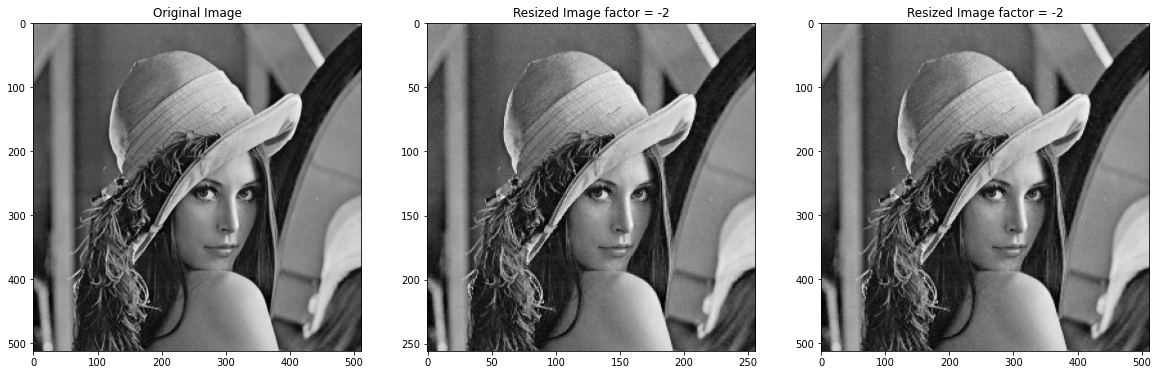

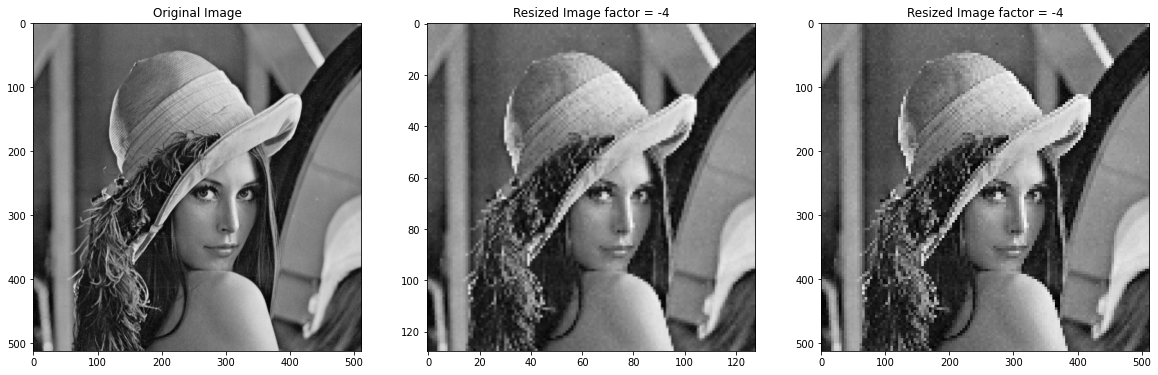

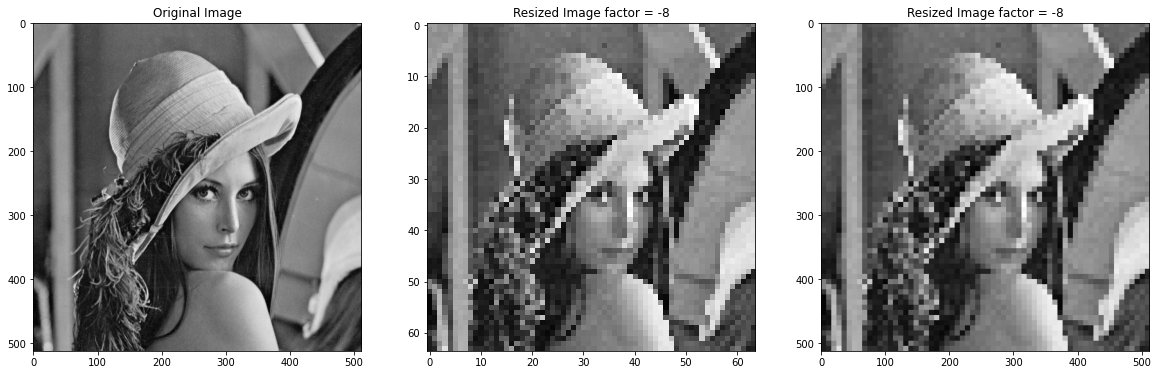

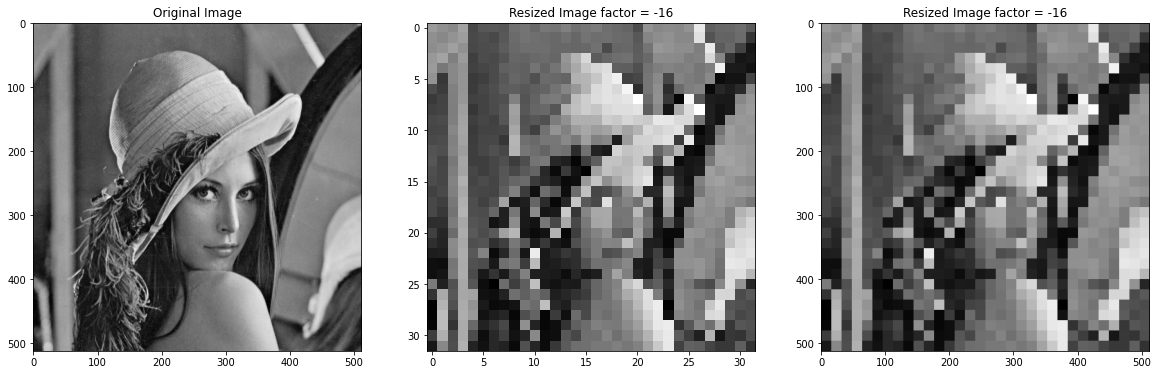

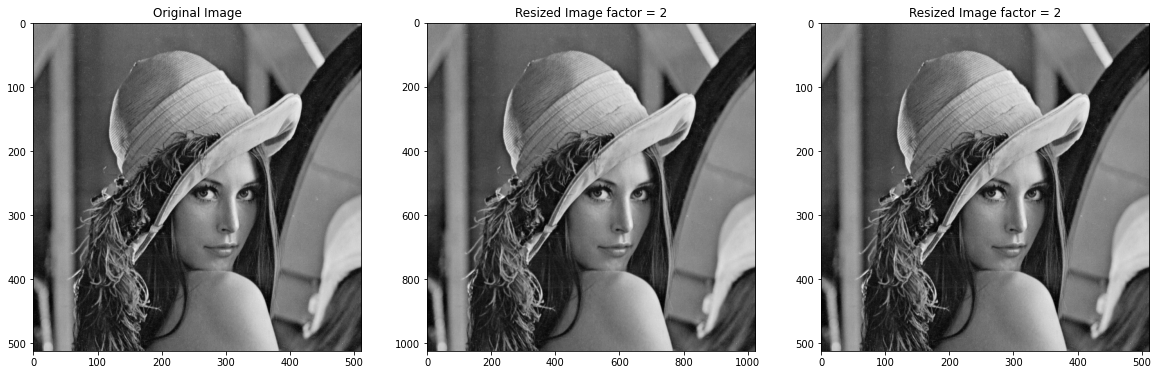

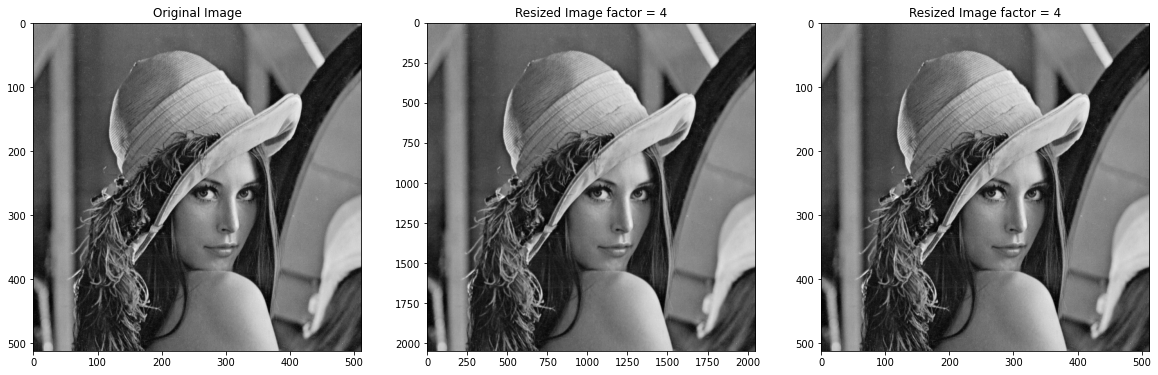

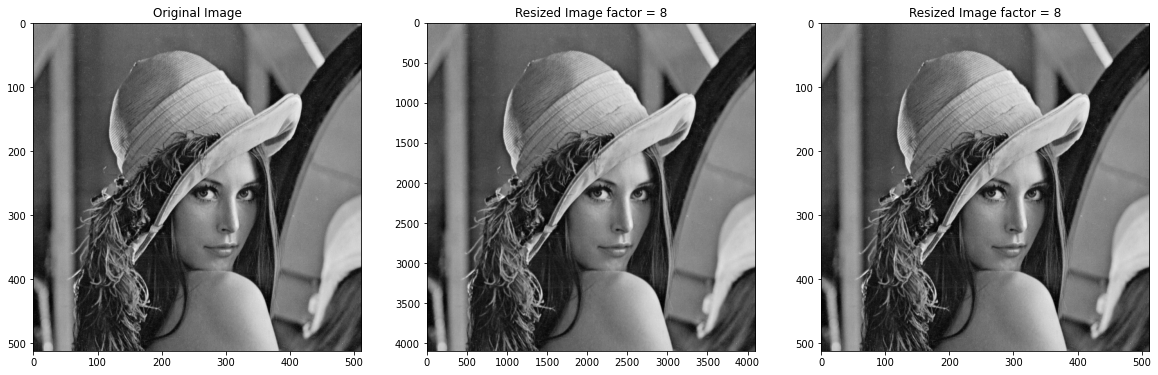

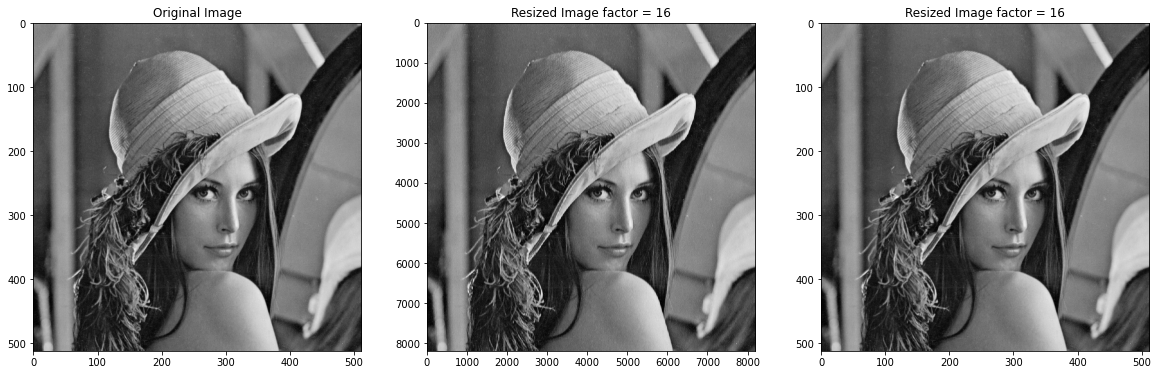

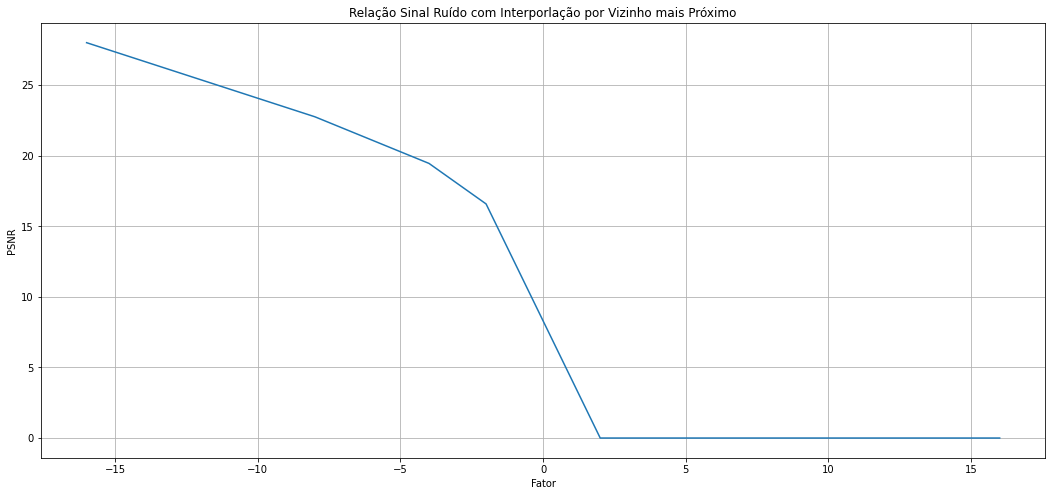

In [ ]:
t0_near = resizing_near()

Now it is done the same thing above but using OpenCV function resize.

In [ ]:
t1 = time.time()
#Here we apply open cv to do the interpolation using the methods above
def resizing_cv():
  image_to_use = 'lennaCinza.png'
  image_base = cv2.imread(image_to_use, 0)
  height, width = image_base.shape

  n = []

  while True:
    factor = input('Enter the factor: ')
    if factor == '0':
      factor = input('Number invalid. Enter the factor: ')
    try:
      n.append(int(factor))
    except ValueError:
      break
  
  PSNR = np.zeros(shape=(len(n)))

  for k in range(len(n)):
    if n[k] > 0:
      new_image = cv2.resize(image_base, (width*n[k], height*n[k]), interpolation=cv2.INTER_NEAREST)
      back_image = cv2.resize(new_image, (width, height), interpolation=cv2.INTER_NEAREST)
    else:
      new_image = cv2.resize(image_base, (int(width/abs(n[k])), int(height/abs(n[k]))), interpolation=cv2.INTER_NEAREST)
      back_image = cv2.resize(new_image, (width, height), interpolation=cv2.INTER_NEAREST)

    PSNR[k] = calculate_psnr(image_base, back_image)

    plt.figure(figsize=(20, 100))

    plt.subplot((len(n)+1), 3, (3*k+1))
    plt.imshow(image_base, cmap='gray') 
    plt.title("Original Image")

    plt.subplot((len(n)+1), 3, (3*k+2)) 
    plt.imshow(new_image, cmap='gray') 
    plt.title("Resized Image factor = " + str(n[k]))

    plt.subplot((len(n)+1), 3, (3*k+3)) 
    plt.imshow(back_image, cmap='gray') 
    plt.title("Resized Image factor = " + str(n[k]))

  plt.figure(figsize = (18,8))
  plt.plot(sorted(n, key = int), PSNR)
  plt.xlabel('Fator')
  plt.ylabel('PSNR')
  plt.grid()
  plt.title('Relação Sinal Ruído com Interporlação por Vizinho Mais Próximo Utilizando OpenCV')
  plt.show()

  return t1
  

Enter the factor: -2
Enter the factor: -4
Enter the factor: -8
Enter the factor: -16
Enter the factor: 2
Enter the factor: 8
Enter the factor: 4
Enter the factor: 16
Enter the factor: s


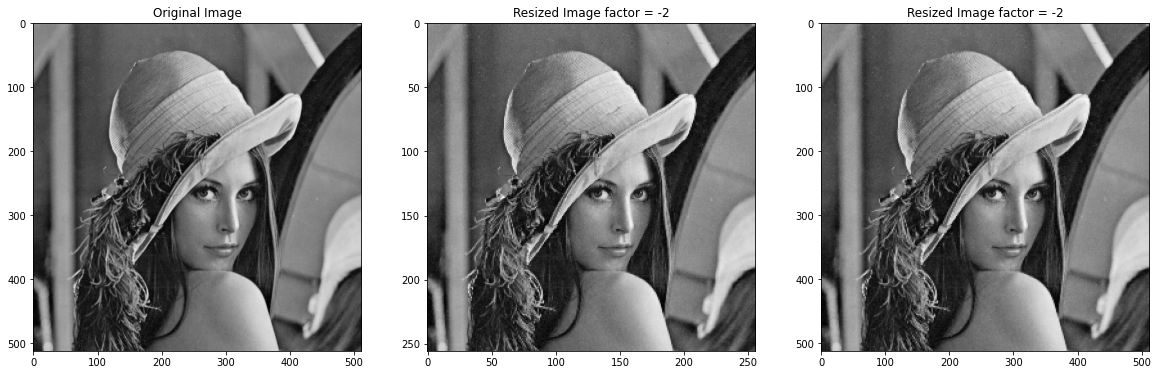

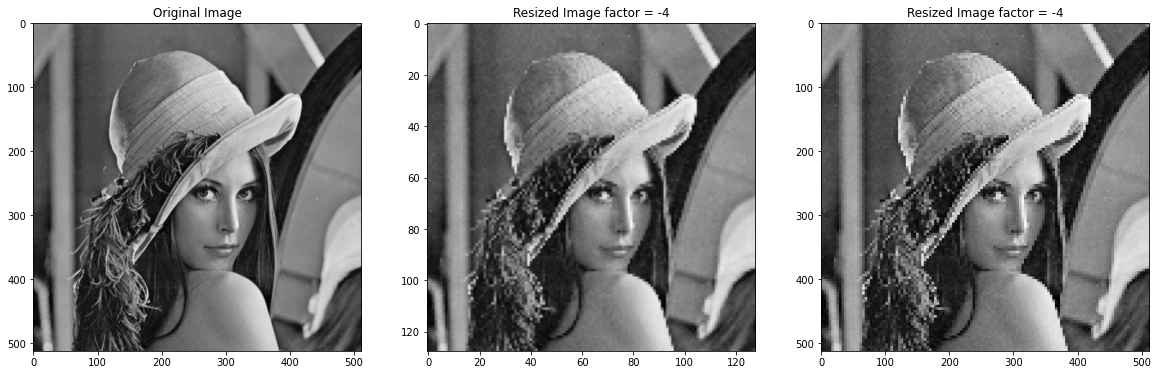

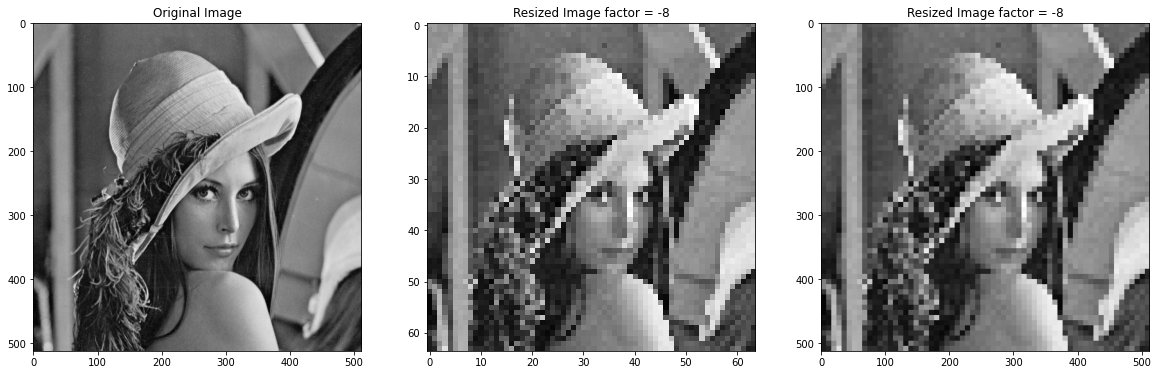

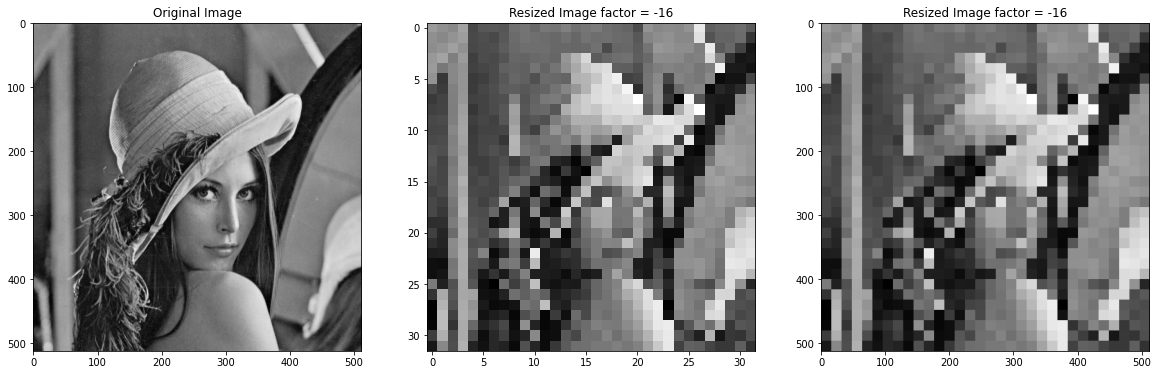

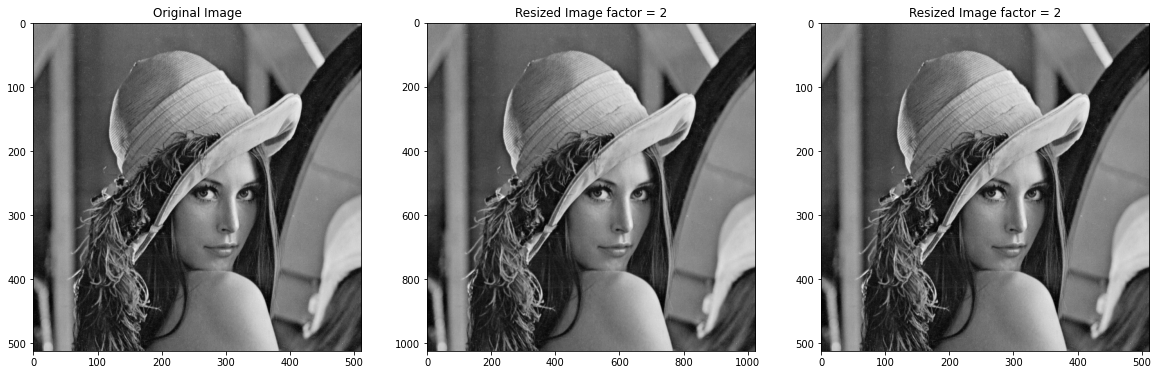

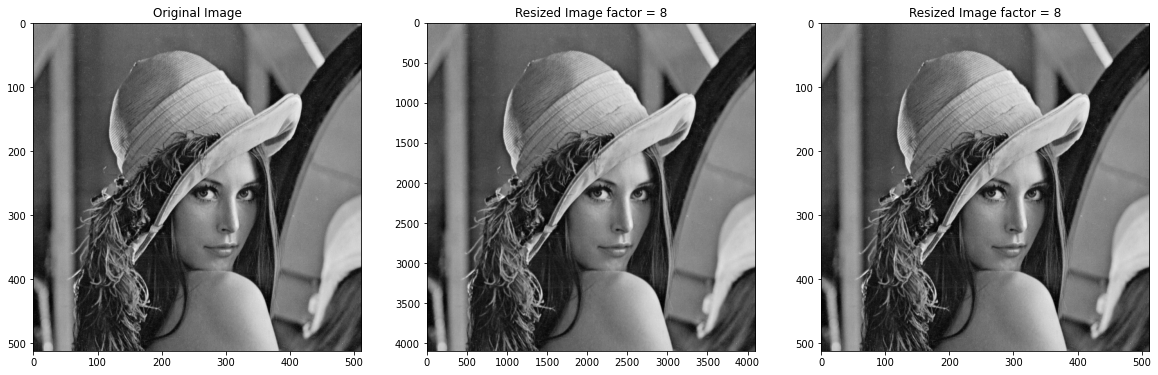

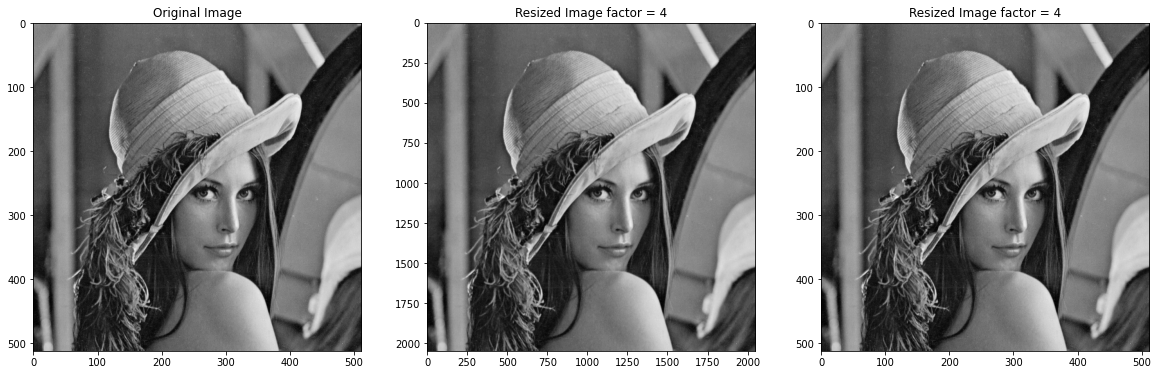

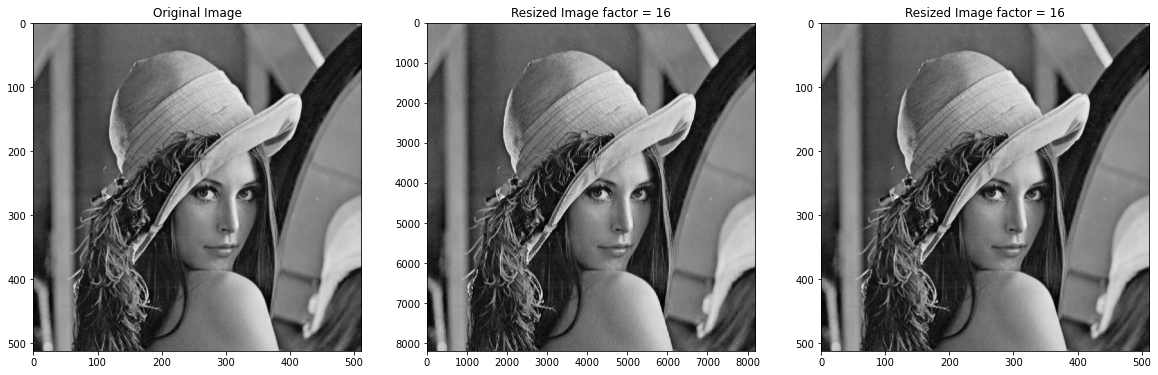

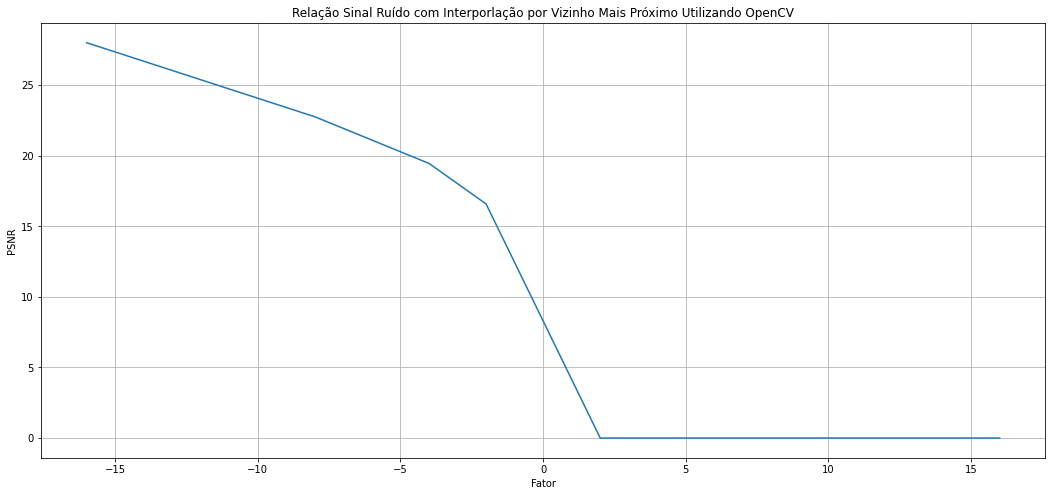

In [ ]:
t1_near = resizing_cv()